In [1]:
from haarpy import weingarten_class
from haarpy import weingarten_element
from functions import cycle_classes_St, z_n, n_subspaces
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics import Permutation

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi}$ only depends on the conjugacy class, so let's first look at the variation across conjugacy classes that have the same length (# of cycles)

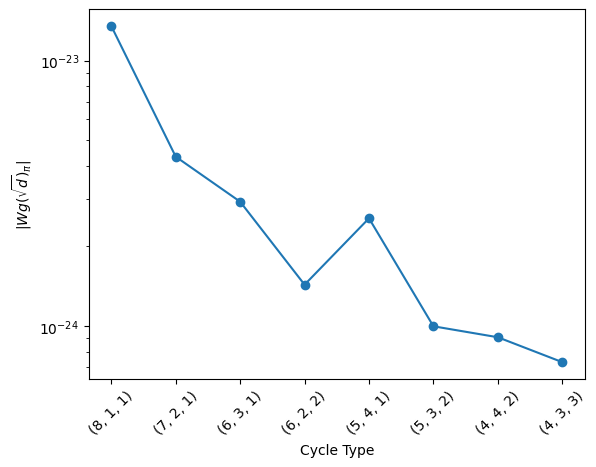

In [2]:
n = 10    # number of qubits
sqrtd = int(2**(n/2))
t = 10     # number of copies
c = 3     # number of cycles in π

conj_cl = cycle_classes_St(t, c)
wg = np.zeros(len(conj_cl))

for i in range(len(conj_cl)):
    wg[i] = weingarten_class(conj_cl[i], sqrtd)        # Weingarten coefficient for the conjugacy class
    
plt.plot(range(len(conj_cl)), np.abs(wg), 'o-')
plt.xticks(range(len(conj_cl)), [str(cl) for cl in conj_cl], rotation=45)
plt.yscale('log')
plt.xlabel('Cycle Type')
plt.ylabel(r'$|Wg(\sqrt{d})_{\pi}|$')
plt.show()

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi\sigma}Wg(\sqrt{d})_{\pi^{-1}\tau\sigma'}$

In [3]:
pi = Permutation.random(t)
pi_inv = ~pi
sigma = Permutation.random(t)
tau = Permutation.random(t)
a = sum(pi.cycle_structure.values())

print(a)

2


**Checking a few random terms**

For a fixed t, uniformly draw 10 samples of $\sigma, \sigma', \pi, \tau$ from $S_t$, and evaluate the trace weighted by Weingarten coefficient (Eq. 47 in overleaf).

In [10]:
Nt = 5   # number of t evaluated
tstart = 10
tstep = 1
d = 2**n
traces = np.zeros(Nt)
samples = 10


for j in range(Nt):
    sample_sum = 0
    for i in range(samples):
        t = j + tstart + tstep
        pi = Permutation.random(t)
        pi_inv = ~pi
        sigma = Permutation.random(t)
        sigma_2 = Permutation.random(t)
        tau = Permutation.random(t)

        prod1 = pi*sigma
        prod2 = pi_inv*tau*sigma_2

        wg1 = weingarten_element(prod1, t, sqrtd)
        wg2 = weingarten_element(prod2, t, sqrtd)

        s = pi.length()
        sum = 0
        
        for m in range(1,t):
            for β in range(0, min(m, s) + 1):
                sum += n_subspaces(t,s,m,β) * d**(2*(t-m+β))

        sample_sum += sum*wg1*wg2
    
    traces[j] = sample_sum/(samples*z_n(n,t))

print(traces)


[ 1.37715358e+27  3.72108906e+31 -1.33054314e+39 -2.76505077e+46
 -7.43463154e+57]


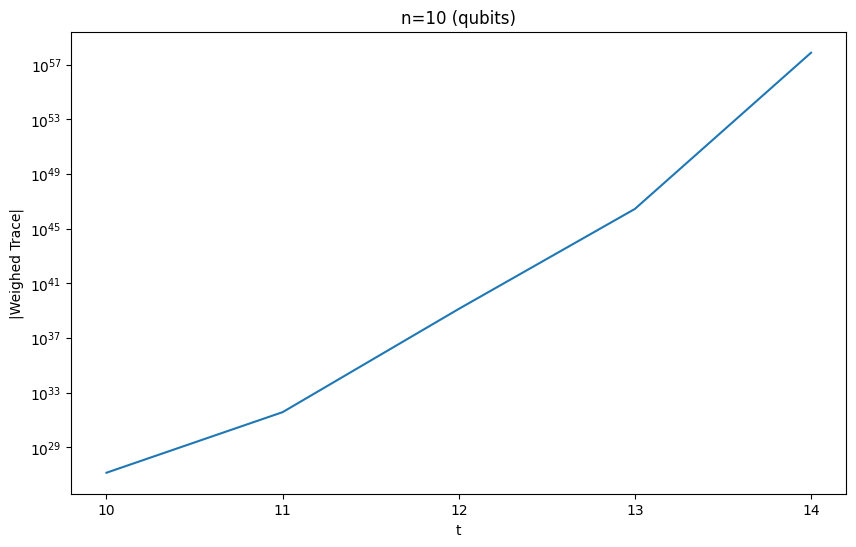

In [11]:
plt.figure(figsize=(10, 6))
xvals = list(range(tstart, tstart + tstep*Nt, tstep))
plt.plot(xvals, abs(traces))
plt.title(f'n={n} (qubits)')
plt.xlabel('t')
plt.yscale('log')
plt.xticks(xvals)
plt.ylabel('|Weighed Trace|')
plt.show()